In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from maze import *
from evaluation import *

In [2]:
def Q_Learning(Q, env, Gamma, Learning_Rate, Epsilon):
 
    reward = 0
    prob = 0.9
    slip_prob = 0.1
    for s in range (States):
        
        greedy = np.random.rand()
        
        if greedy > Epsilon:
            a = np.argmax(Q[s,:])
        else:
            a = np.random.randint(4)
        
        temp_Q = 0
        reward, next_state, done = env.step(s,a)
        #Q[s,a] = prob * ((1-Learning_Rate) * Q[s,a] + Learning_Rate * (reward + Gamma * np.max(Q[next_state,:])))

        a1 = ACTMAP[a]         

        reward_slip, next_state_slip, done = env.step(s,a1)
        temp_Q = prob * ((1-Learning_Rate) * Q[s,a] + Learning_Rate * (reward + Gamma * np.max(Q[next_state,:])))
        temp_Q += slip_prob * ((1-Learning_Rate) * Q[s,a] + Learning_Rate * (reward_slip + Gamma * np.max(Q[next_state_slip,:])))

        Q[s,a] = temp_Q
      
    return Q

In [15]:
env = Maze()
ACTMAP = {0:3, 1:2, 2:0, 3:1}
States = 112
Actions = 4
Gamma = 0.9
ACTMAP = {0:3, 1:2, 2:0, 3:1}
env.slip = 0
Q = np.zeros((States,Actions))
Policy = np.zeros(States)
Learning_Rate = 0.9
Epsilon = 0.2
Steps = 5000
OrgEpsilon = Epsilon
OrgLearning_Rate = Learning_Rate
Learn_Decay = OrgLearning_Rate/(2*Steps)
Epsilon_Decay = OrgEpsilon/Steps

for i in range(Steps):
    Q = Q_Learning(Q, env, Gamma, Learning_Rate, Epsilon)
    Epsilon -= Epsilon_Decay
    Learning_Rate -= Learn_Decay
    
for s in range (States):
    Policy[s] = np.argmax(Q[s,:])
    
    
NormVal = np.max(Q)
NormQ = Q/NormVal

#print("Q:")
#print(Q)
#print("")

print("Normilized Q:")
print(NormQ)
print("")

print("Policy:")
print(Policy)
print("")

Normilized Q:
[[0.15875732 0.17639702 0.15875732 0.16071728]
 [0.20644776 0.2293864  0.20644776 0.2089965 ]
 [0.25893158 0.28770175 0.25893158 0.26212826]
 [0.25209153 0.2801017  0.25209153 0.25520377]
 [0.33411207 0.37123563 0.33411207 0.33823691]
 [0.32202634 0.35780704 0.32202634 0.32600197]
 [0.38070466 0.42300518 0.38070466 0.38540472]
 [0.48254785 0.53616428 0.48254785 0.48850523]
 [0.16291922 0.17835699 0.17639702 0.19817443]
 [0.2118599  0.23193514 0.2293864  0.25770571]
 [0.2657196  0.29089844 0.28770175 0.32322049]
 [0.25870024 0.28321394 0.2801017  0.31468216]
 [0.34287099 0.37536047 0.37123563 0.41706719]
 [0.33046842 0.36178268 0.35780704 0.40198075]
 [0.39068503 0.42770524 0.42300518 0.47522804]
 [0.49519809 0.54212166 0.53616428 0.6023574 ]
 [0.20969539 0.23349159 0.23115667 0.20845403]
 [0.30515204 0.33955409 0.33615855 0.30497441]
 [0.2363742  0.23349159 0.23349159 0.2594351 ]
 [0.30804948 0.34284199 0.33941357 0.30741143]
 [0.34374612 0.33955409 0.33955409 0.37728232]

1.6102655512871363e-16


<IPython.core.display.Javascript object>


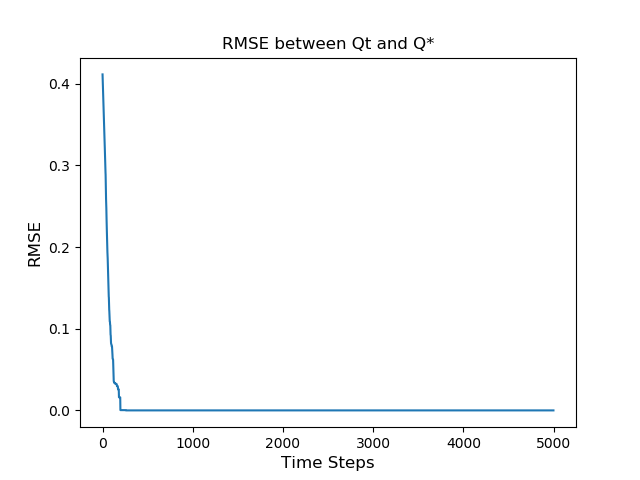

In [16]:
New_Q = np.zeros((States,Actions))
Epsilon = OrgEpsilon
Learning_Rate = OrgLearning_Rate

RMSE = np.zeros(Steps)

#Part1_Q = np.load('Q_Table.npy')
Part1_Norm_Q = np.load('Norm_Q_Table.npy')

for i in range(Steps):
    New_Q = Q_Learning(New_Q, env, Gamma, Learning_Rate, Epsilon)
    NormVal = np.max(New_Q)
    NormQ2 = New_Q/NormVal
    RMSE[i] = np.sqrt(np.mean((Part1_Norm_Q - NormQ2)**2))
    Epsilon -= Epsilon_Decay
    Learning_Rate -= Learn_Decay

print(RMSE[-1])

fig = plt.figure()
plt.plot(RMSE)
plt.title('RMSE between Qt and Q*', fontsize=12)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

fig.savefig('e' + str(OrgEpsilon) + 'l' + str(OrgLearning_Rate) + '.png')

In [36]:
env = Maze()
States = 112
Actions = 4
Gamma = 0.9
ACTMAP = {0:3, 1:2, 2:0, 3:1}
env.slip = 0
Q = np.zeros((States,Actions))
Policy = np.zeros(States)
Learning_Rate = 0.9
Epsilon = 0.2
Steps = 5000
OrgEpsilon = Epsilon
OrgLearning_Rate = Learning_Rate
Learn_Decay = OrgLearning_Rate/(2*Steps)
Epsilon_Decay = OrgEpsilon/Steps

eval_steps, eval_reward = [], []
learning = True
j = 0

avg_step, avg_reward = evaluation(env, Q)
eval_steps.append(avg_step)
eval_reward.append(avg_reward)

while learning:

    for i in range(50):
        j += 1
        Q = Q_Learning(Q, env, Gamma, Learning_Rate, Epsilon)
        Epsilon -= Epsilon_Decay
        Learning_Rate -= Learn_Decay
        
    avg_step, avg_reward = evaluation(env, Q)
    eval_steps.append(avg_step)
    eval_reward.append(avg_reward)
    
    if (j>=Steps):
        learning = False

<IPython.core.display.Javascript object>


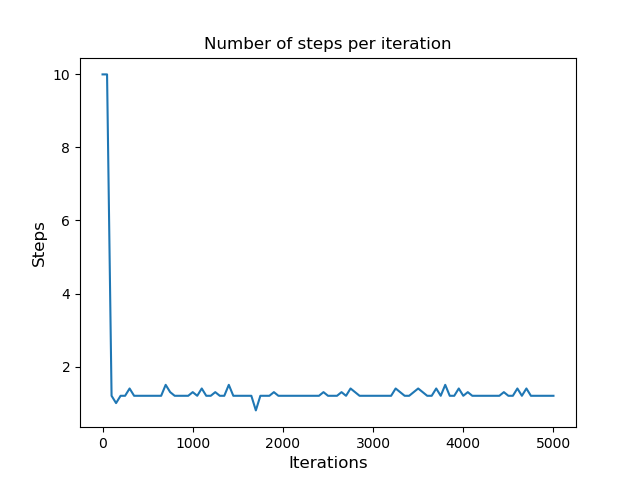

<IPython.core.display.Javascript object>


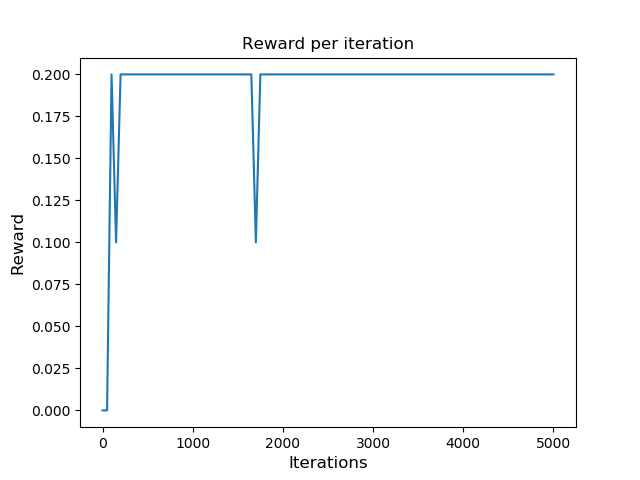

In [37]:
f1, ax1 = plt.subplots()
ax1.plot(np.arange(0,5001,50), eval_steps)
ax1.set_title('Number of steps per iteration', fontsize=12)
ax1.set_xlabel('Iterations', fontsize=12)
ax1.set_ylabel('Steps', fontsize=12)
f2, ax2 = plt.subplots()
ax2.plot(np.arange(0,5001,50), eval_reward)
ax2.set_title('Reward per iteration', fontsize=12)
ax2.set_xlabel('Iterations', fontsize=12)
ax2.set_ylabel('Reward', fontsize=12)

f1.savefig('steps e' + str(OrgEpsilon) + 'l' + str(OrgLearning_Rate) + '.png')
f2.savefig('reward e' + str(OrgEpsilon) + 'l' + str(OrgLearning_Rate) + '.png')